# Experiment 2 plot graph detph

In [1]:
from pathlib import Path
import pandas as pd
import pickle
import seaborn as sns
from collections import defaultdict
import matplotlib.pyplot as plt

In [2]:
from natsort import natsorted

In [3]:
import sys, os
from pathlib import Path

sys.path.append(str(Path(os.path.abspath("")).parent))
import config

In [4]:
RES_METRIC = 'score/test'

In [5]:
BASE_DIR = Path(config.dpath) / 'experiments/thesis/graph_depth/'
BASE_DIR = str(BASE_DIR)
BASE_DIR

'/shareddata/home/holden/gnn-entailment-caption/experiments/thesis/graph_depth'

In [6]:
configs = [("premise", "Premise Selection"),
          ('similarity', 'Graph Similarity')]


#configs = [('similarity', 'Graph Similarity')]

## Helpers 

In [7]:
def plot(results, title):
    ax = sns.lineplot(results)
    ax.set_title(title)
    ax.set_ylabel('Score')
    ax.set_ylim(0, ax.get_ylim()[1]*1.1) 

    ax.set_xlabel('GCN Layers')
    plt.show()  

    
def read_results(config_dir, exp_dirs, tag, results):
            
    for exp_dir in exp_dirs:
        history = Path(config_dir) / exp_dir / 'history.pkl'
        with open(history, 'rb') as f:
            r = pickle.load(f)[RES_METRIC][-1]
            results[tag].append(r)
            
    return results

# Make plots

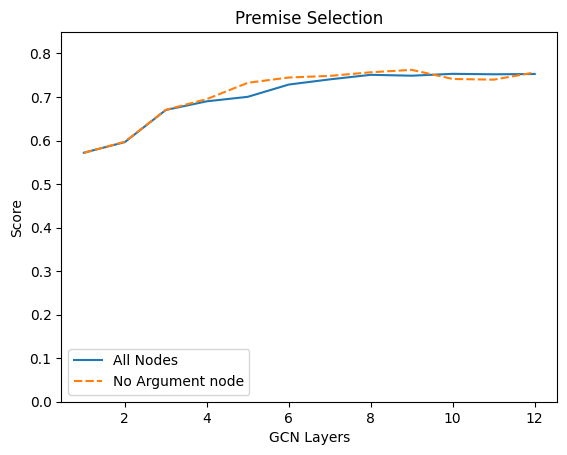

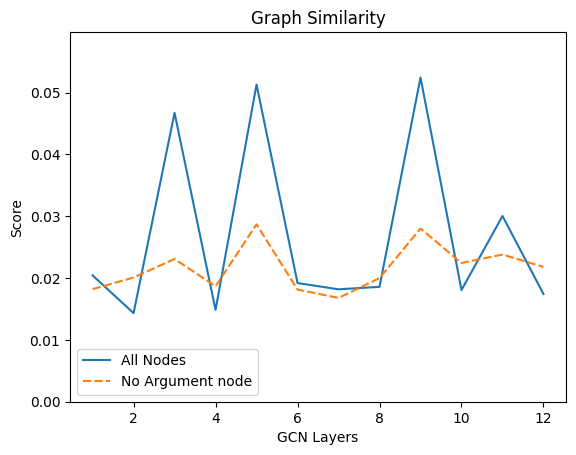

In [8]:
for conf, title in configs:
    
    res = defaultdict(list)

    # Read all nodes
    config_dir = os.path.join(BASE_DIR, conf)
    exp_dirs = natsorted(os.listdir(config_dir))
    exp_dirs = [exp for exp in exp_dirs if 'remove_argument_node_False' in exp]
    res = read_results(config_dir, exp_dirs, 'All Nodes', res)

    
    # Read without argument nodes
    config_dir = os.path.join(BASE_DIR, conf)
    exp_dirs = natsorted(os.listdir(config_dir))
    exp_dirs = [exp for exp in exp_dirs if 'remove_argument_node_True' in exp]
    res = read_results(config_dir, exp_dirs, 'No Argument node', res)
    
    # Convert to df
    res = pd.DataFrame(res)
    res.index += 1 

    # Plot the results
    plot(res, title)